In [66]:
import sys
sys.path.append('./src')

import numpy as np
import matplotlib.pyplot as plt
from PyAstronomy import pyasl
from datetime import datetime

from FIESTA_functions import *
from HARPS_N_functions import *
from NEID_solar_functions import *
from functions import *



In [67]:
#----------------------------------
# Read data
#----------------------------------

v_grid  = np.loadtxt('./lib/data_v4/v_grid.txt')
CCF     = np.loadtxt('./lib/data_v4/CCF.txt')
σCCF   = np.loadtxt('./lib/data_v4/σCCF.txt')
bjd     = np.loadtxt('./lib/data_v4/bjd.txt')
rv      = np.loadtxt('./lib/data_v4/rv.txt')
σrv     = np.loadtxt('./lib/data_v4/σrv.txt')
idx_rej = np.array(np.loadtxt('./lib/data_v4/idx_rej'), dtype=bool)

# Simulate shift

In [68]:
start_date = datetime(2021, 5, 28)
end_date = datetime(2021, 5, 28)
# end_date = datetime(2021, 5, 29)

T1 = pyasl.jdcnv(start_date)
T2 = pyasl.jdcnv(end_date)
idx = (bjd>=T1) & (bjd<=T2+1) & (~idx_rej)

In [69]:
from scipy.interpolate import CubicSpline

# CCF_tpl = np.mean(CCF_daily, axis=1)
CCF_tpl = CCF[:,idx][:,0]
cs = CubicSpline(v_grid, CCF_tpl, extrapolate=True)

CCF_daily_sh = np.zeros(CCF[:,idx].shape)
σCCF_daily_sh = np.zeros(CCF[:,idx].shape)

shift = np.arange(200)/200/100
print(max(shift)*1000)
for i in range(200):
    CCF_daily_sh[:,i] = cs(v_grid-shift[i])
    σCCF_daily_sh[:,i] = (1-CCF_tpl)**0.5/7e4

9.950000000000001


In [70]:
k_max = 47
df, RV_FT_k, eRV_FT_k, A_k, eA_k, RV_gauss = FIESTA(v_grid, CCF_daily_sh, σCCF_daily_sh/10, 
                                                    template=CCF_tpl, k_max=k_max)

order_max = 47
RV_FIESTA = np.average(RV_FT_k[:order_max], axis=0, weights=A_k[:order_max])*1000
print(np.mean(A_k[order_max-1]))

RV_FT_k  *= 1000
eRV_FT_k *= 1000
RV_gauss *= 1000
ΔRV_k     = RV_FT_k - RV_FIESTA


Velocity grid used [87.25, 110.75]

ξ_normal = 1.98


The median SNR of all CCFs is 672217
ξ_modelling_noise = 1.98


Based on the user-defined SNR = 2.0:
ξ_individual = 1.98
ξ_timeseries = 1.52

In summary, the cut-off frequency for FIESTA is recommended to be 1.52 (36 frequency modes)

        ξ  individual_SNR  ts_SNR_A  ts_SNR_ϕ  modelling noise  \
0   0.000       1481727.6       6.6       0.0          0.13671   
1   0.042        941087.6       6.6     719.2          0.04868   
2   0.084        347864.3       6.4     529.8          0.01183   
3   0.126         85298.8       6.3     197.3          0.00242   
4   0.168         17401.7       5.2      49.1          0.00055   
5   0.211          1457.1       6.6       5.9          0.00051   
6   0.253          1696.0       1.4       1.3          0.00046   
7   0.295          1278.8       0.0       0.2          0.00043   
8   0.337          1209.9       1.0       0.8          0.00039   
9   0.379           922.9       0.2       0.3     

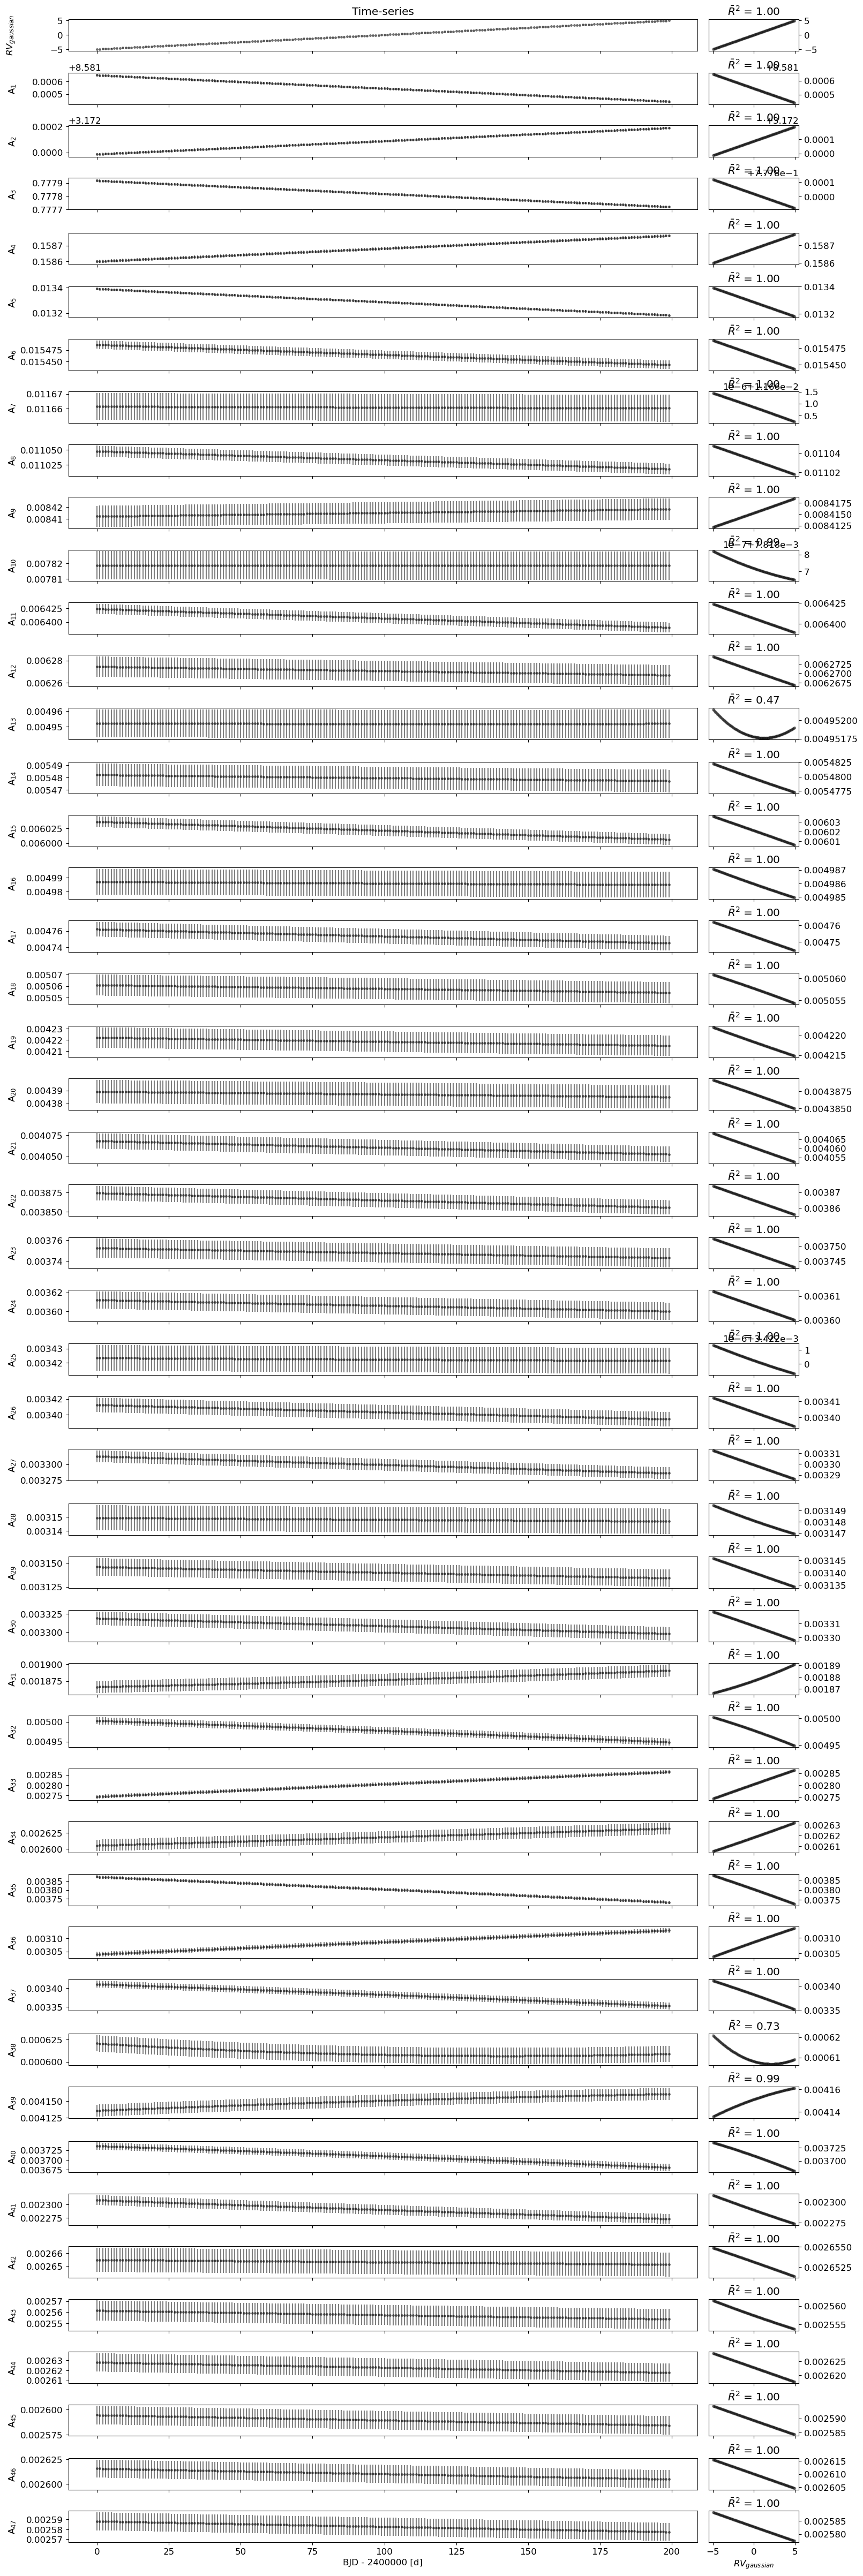

In [6]:
plot_ts_corr(k_mode=k_max, t=np.arange(200), rv=RV_gauss, erv=np.ones(200)/1e3, 
    ind=A_k, eind=eA_k, 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{gaussian}$', 
    pe_xlabel='Period [days]',
    ind_yalbel='A',
    file_name='',
    HARPS=False)
plt.show()

plot_ts_corr(k_mode=k_max, t=np.arange(200), rv=RV_gauss, erv=np.ones(200)/1e3, 
    ind=RV_FT_k, eind=eRV_FT_k, 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{gaussian}$', 
    pe_xlabel='Period [days]',
    ind_yalbel=r'$RV_{FT}$',
    file_name='',
    HARPS=False)
plt.show()

plot_ts_corr(k_mode=k_max, t=np.arange(200), rv=RV_gauss, erv=np.ones(200)/1e3, 
    ind=ΔRV_k, eind=eRV_FT_k, 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{gaussian}$', 
    pe_xlabel='Period [days]',
    ind_yalbel=r'$\Delta RV$',
    file_name='',
    HARPS=False)
plt.show()

# Start analysis

In [42]:
start_date = datetime(2021, 5, 28)
end_date = datetime(2021, 5, 28)
# end_date = datetime(2021, 5, 29)

T1 = pyasl.jdcnv(start_date)
T2 = pyasl.jdcnv(end_date)
idx = (bjd>=T1) & (bjd<=T2+1) & (~idx_rej)

In [43]:
CCF.shape, CCF[:,idx].shape

((95, 31795), (95, 200))

In [44]:
k_max = 47
df, RV_FT_k, eRV_FT_k, A_k, eA_k, RV_gauss = FIESTA(v_grid, CCF[:,idx], σCCF[:,idx], k_max=k_max)

order_max = k_max
RV_FIESTA = np.average(RV_FT_k[:order_max], axis=0, weights=A_k[:order_max])*1000
print(np.mean(A_k[order_max-1]))

RV_FT_k  *= 1000
eRV_FT_k *= 1000
RV_gauss *= 1000
ΔRV_k     = RV_FT_k - RV_FIESTA


Velocity grid used [87.25, 110.75]

ξ_normal = 0.67


The median SNR of all CCFs is 6087
ξ_modelling_noise = 1.31


Based on the user-defined SNR = 2.0:
ξ_individual = 1.98
ξ_timeseries = 0.04

In summary, the cut-off frequency for FIESTA is recommended to be 0.04 (1 frequency modes)

        ξ  individual_SNR  ts_SNR_A  ts_SNR_ϕ  modelling noise  \
0   0.000         13435.1       6.0       0.0          0.13676   
1   0.042          8529.8       2.8       2.4          0.04869   
2   0.084          3152.9       1.7       2.1          0.01186   
3   0.126           774.6       1.3       1.4          0.00243   
4   0.168           157.9       0.9       1.1          0.00055   
5   0.211            12.3       0.9      14.8          0.00052   
6   0.253            16.8       0.8       0.9          0.00045   
7   0.295            11.4       0.9       0.8          0.00042   
8   0.337            10.5       0.8       0.7          0.00039   
9   0.379             8.7       0.7       0.6        

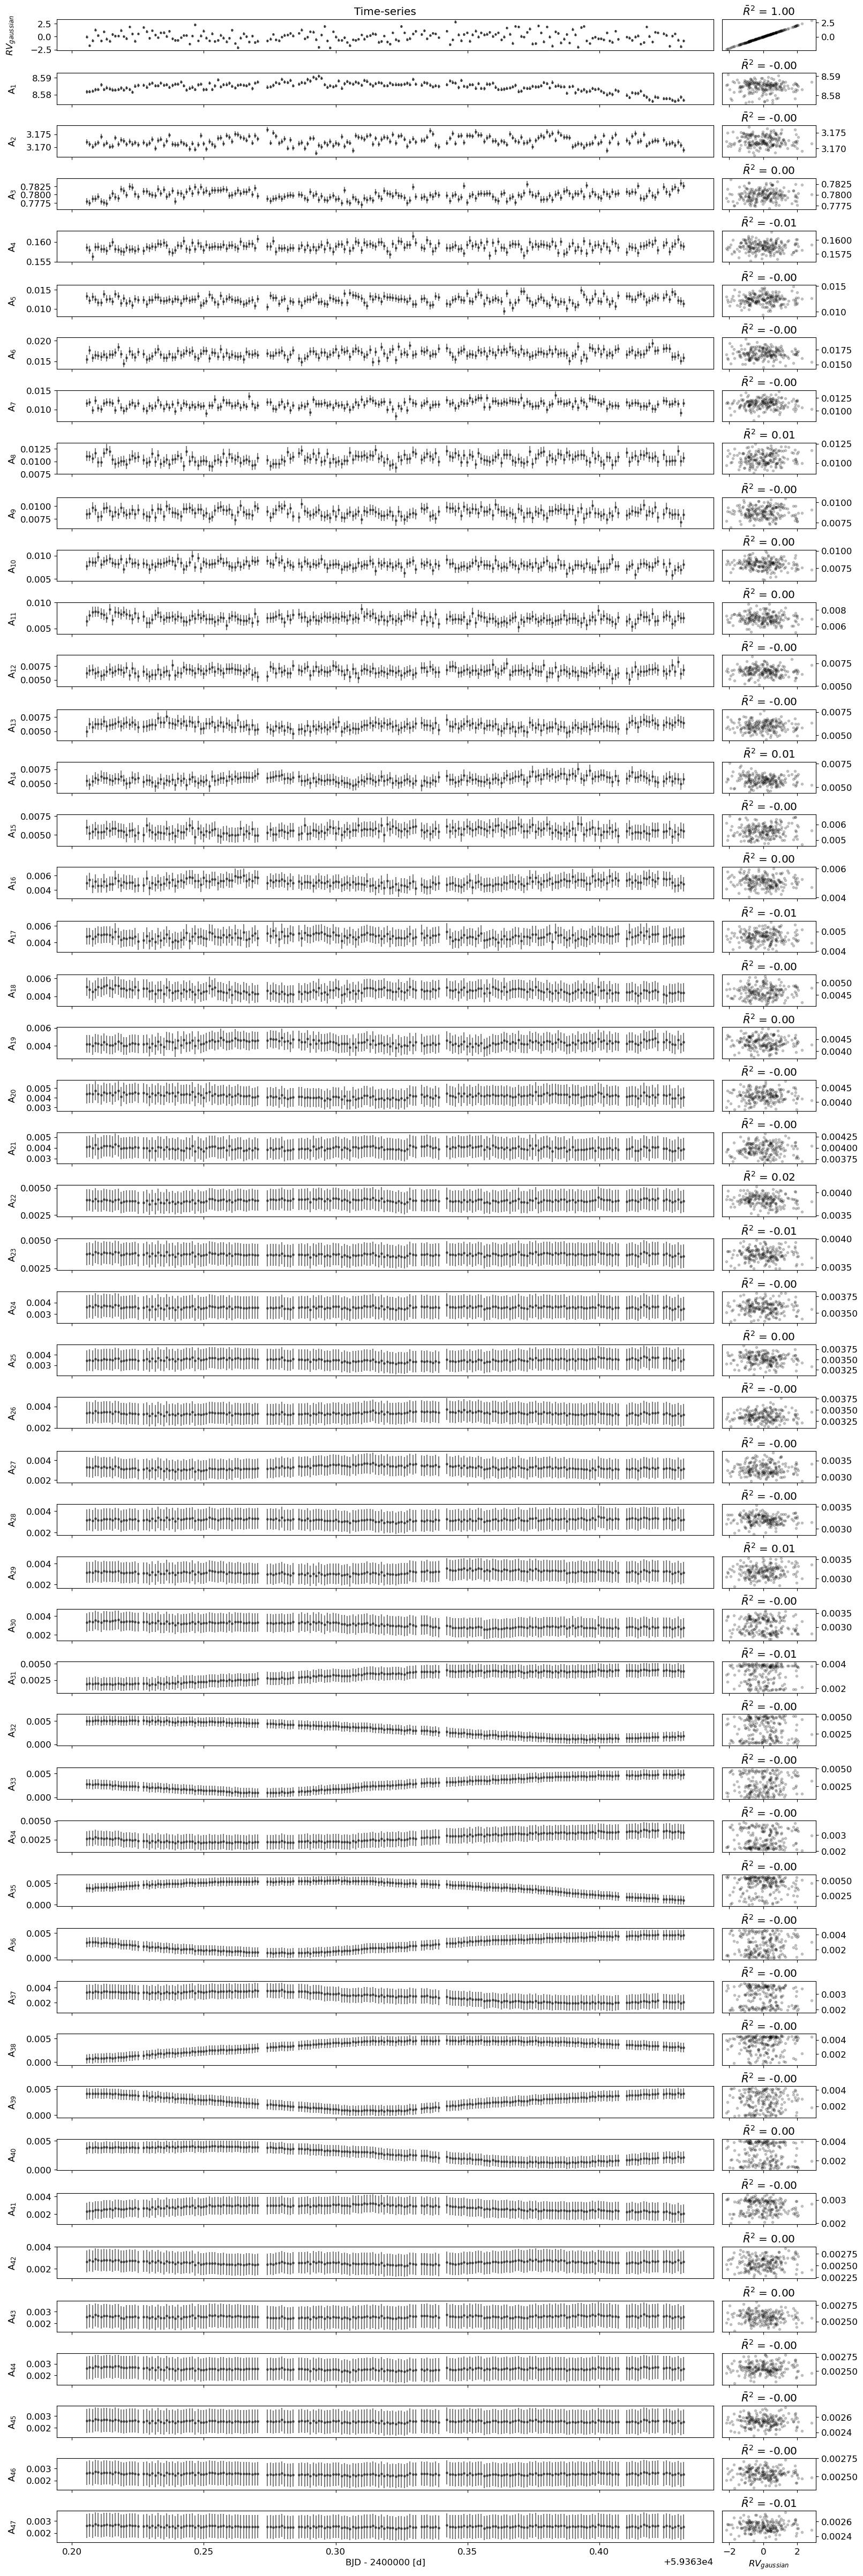

In [12]:
plot_ts_corr(k_mode=k_max, t=bjd[idx]-2400000, rv=RV_gauss, erv=σrv[idx], 
    ind=A_k, eind=eA_k, 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{gaussian}$', 
    pe_xlabel='Period [days]',
    ind_yalbel='A',
    file_name='',
    HARPS=False)
plt.show()

plot_ts_corr(k_mode=k_max, t=bjd[idx]-2400000, rv=RV_gauss, erv=σrv[idx], 
    ind=RV_FT_k, eind=eRV_FT_k, 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [days]',
    ind_yalbel=r'$RV_{FT}$',
    file_name='',
    HARPS=False)
plt.show()

plot_ts_corr(k_mode=k_max, t=bjd[idx]-2400000, rv=RV_gauss, erv=σrv[idx], 
    ind=ΔRV_k, eind=eRV_FT_k, 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [days]',
    ind_yalbel=r'$\Delta RV$',
    file_name='',
    HARPS=False)
plt.show()

# Models

In [47]:
bjd_daily = bjd[idx]-2400000
rv_daily = RV_FIESTA
σrv_daily = σrv[idx]

In [62]:
X = ΔRV_k.T
# X = np.vstack((ΔRV_k[:5], A_k[:5])).T
Y = rv_daily - np.mean(rv_daily) 
W = 1/σrv_daily**2
X.shape, Y.shape

((200, 47), (200,))

In [63]:
from multiprocessing import Pool
import time
import math
from scipy import optimize
import scipy.optimize as opt

In [64]:
X_dim = X.shape[1]
N = 10

# injected parameters 
amp = np.logspace(-1, 1, N)
t_inj = 0.5
phase_inj = 1

t = bjd_daily - min(bjd_daily)
w_array_1 = np.zeros((N, X_dim))
amp_pred_1 = np.zeros(N)
rms_array_1 = np.zeros(N)
phase_pred_1 = np.zeros(N)
t_pred_1 = np.zeros(N)

amp_pred_2 = np.zeros(N)
rms_array_2 = np.zeros(N)
phase_pred_2 = np.zeros(N)
t_pred_2 = np.zeros(N)

def wmse(y1, y2, w):
    wmse = np.average((y1-y2)**2, weights = w)
    return wmse

def model_1(params):
    planet_rv_model = 10**params[X_dim+1]*np.sin(10**params[X_dim+3]*t + params[X_dim+2]) 
    stellar_rv_model = np.sum(params[:X_dim]*X, axis=1) + params[X_dim]
    rv_model = planet_rv_model + stellar_rv_model
    return rv_model

def model_2(params):
    '''
        Keplerian model
    '''
    planet_rv_model = 10**params[0]*np.sin(10**params[2]*t + params[1]) 
    return planet_rv_model

def execute(i):
    y = Y + amp[i] *np.sin(t_inj*t+phase_inj)  
    
    def loss_1(params):
        return wmse(model_1(params), y, W)
    
    def loss_2(params):
        return wmse(model_2(params), y, W)    
    
    sol_1 = opt.dual_annealing(loss_1, bounds=[[-5,5] for i in np.arange(X_dim+1)] + [[-1.1,1.1], [0, np.pi], [np.log10(t_inj/1.5), np.log10(t_inj*1.5)]],  maxiter=1000)
    sol_2 = opt.dual_annealing(loss_2, bounds= [[-1.1,1.1], [0, np.pi], [np.log10(t_inj/1.5), np.log10(t_inj*1.5)]],  maxiter=1000)
    
    fitted_params_1 = sol_1.x
    fitted_params_2 = sol_2.x    

    w_array_1[i] = fitted_params_1[:X_dim]
    amp_pred_1[i] = 10**fitted_params_1[X_dim+1]
    phase_pred_1[i] = fitted_params_1[X_dim+2]
    t_pred_1[i] = 10**fitted_params_1[X_dim+3]
    rms_array_1[i] = loss_1(fitted_params_1)**0.5

    amp_pred_2[i] = 10**fitted_params_2[0]
    phase_pred_2[i] = fitted_params_2[1]
    t_pred_2[i] = 10**fitted_params_2[2]
    rms_array_2[i] = loss_2(fitted_params_2)**0.5
    
    return w_array_1[i], amp_pred_1[i], phase_pred_1[i], t_pred_1[i] , rms_array_1[i], amp_pred_2[i], phase_pred_2[i], t_pred_2[i], rms_array_2[i]

if __name__ == "__main__":
    # first way, using multiprocessing
    start_time = time.perf_counter()
    
    with Pool(processes=os.cpu_count()) as pool:
        result = pool.map(execute, range(0,N)) 
    
    finish_time = time.perf_counter()
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))
    print("---")

for i in range(len(result)):
    w_array_1[i], amp_pred_1[i], phase_pred_1[i], t_pred_1[i] , rms_array_1[i], amp_pred_2[i], phase_pred_2[i], t_pred_2[i], rms_array_2[i] = result[i]  = result[i] 
    
print('amp\n', amp)
print('amp_pred\n', amp_pred_1)
print('amp_pred\n', amp_pred_2)

Program finished in 10.63348111603409 seconds - using multiprocessing
---
amp
 [ 0.1         0.16681005  0.27825594  0.46415888  0.77426368  1.29154967
  2.15443469  3.59381366  5.9948425  10.        ]
amp_pred
 [0.07943282 0.07943282 0.07943282 0.07943282 0.20131988 0.07949583
 0.08323772 0.11571234 1.94907757 6.81654259]
amp_pred
 [0.37099013 0.36797651 0.38699313 0.47017978 0.68781848 1.12442301
 1.90165508 3.22660333 5.45295551 9.28640753]


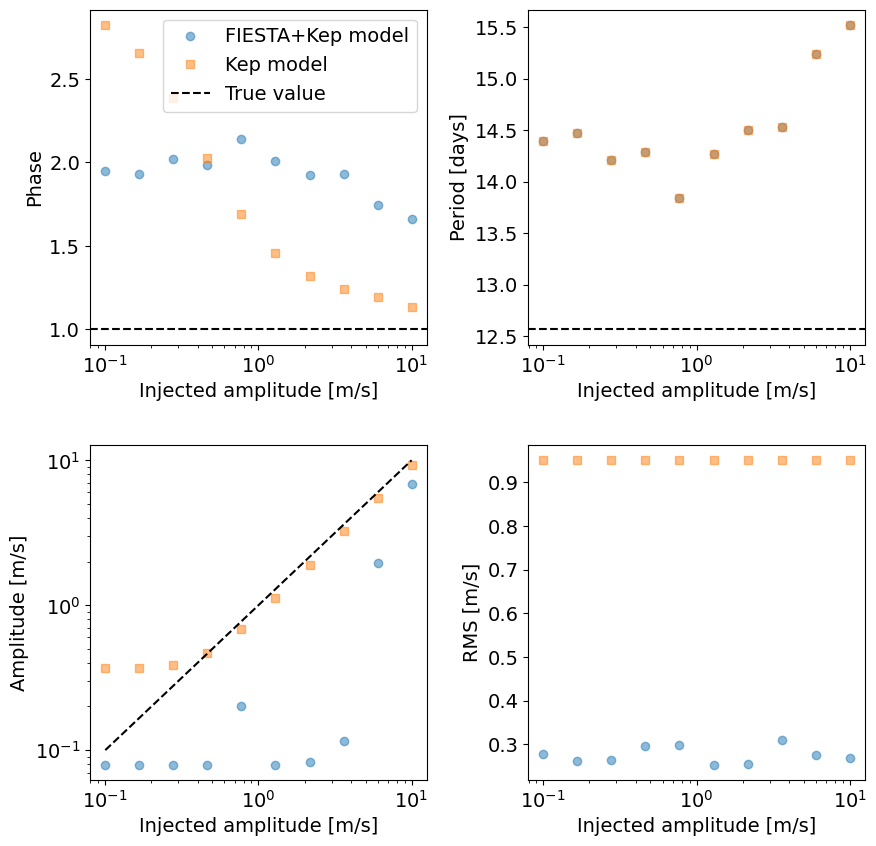

In [65]:
plt.rcParams['font.size'] = '14'

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

axs[0,0].plot(amp, phase_pred_1, 'o', alpha=0.5, label='FIESTA+Kep model')
axs[0,0].plot(amp, phase_pred_2, 's', alpha=0.5, label='Kep model')
axs[0,0].set_xscale('log')
axs[0,0].axhline(y = phase_inj, color = 'k', linestyle = '--', label='True value')
axs[0,0].set_xlabel('Injected amplitude [m/s]')
axs[0,0].set_ylabel('Phase')
axs[0,0].legend()

axs[0,1].plot(amp, 2*np.pi/t_pred_1, 'o', alpha=0.5)
axs[0,1].plot(amp, 2*np.pi/t_pred_1, 's', alpha=0.5)
axs[0,1].set_xscale('log')
axs[0,1].axhline(y = 2*np.pi/t_inj, color = 'k', linestyle = '--')
axs[0,1].set_xlabel('Injected amplitude [m/s]')
axs[0,1].set_ylabel('Period [days]')

axs[1,0].plot(amp, amp_pred_1, 'o', alpha=0.5)
axs[1,0].plot(amp, amp_pred_2, 's', alpha=0.5)
axs[1,0].plot(amp, amp, 'k--')
axs[1,0].set_xlabel('Injected amplitude [m/s]')
axs[1,0].set_ylabel('Amplitude [m/s]')
axs[1,0].set_xscale('log')
axs[1,0].set_yscale('log')


axs[1,1].plot(amp, rms_array_1, 'o', alpha=0.5)
axs[1,1].plot(amp, rms_array_2, 's', alpha=0.5)
axs[1,1].set_xlabel('Injected amplitude [m/s]')
axs[1,1].set_ylabel('RMS [m/s]')
axs[1,1].set_xscale('log')

plt.show()

# Inject a sine signal

In [71]:
from scipy.interpolate import CubicSpline

RV_planet = 0.5*np.sin(bjd_daily*100)
for i in range(len(rv_daily)):
    cs = CubicSpline(v_grid, CCF[:,idx][:,i], extrapolate=True)
    CCF_daily_sh[:,i] = cs(v_grid-RV_planet[i])

In [72]:
order_max = 47
df, RV_FT_k, eRV_FT_k, A_k, eA_k, RV_gauss = FIESTA(v_grid, CCF_daily_sh, σCCF[:,idx], k_max=k_max)

order_max = k_max
RV_FIESTA = np.average(RV_FT_k[:order_max], axis=0, weights=A_k[:order_max])*1000
print(np.mean(A_k[order_max-1]))

RV_FT_k  *= 1000
eRV_FT_k *= 1000
RV_gauss *= 1000
ΔRV_k     = RV_FT_k - RV_FIESTA


Velocity grid used [87.25, 110.75]

ξ_normal = 0.67


The median SNR of all CCFs is 6093
ξ_modelling_noise = 1.22


Based on the user-defined SNR = 2.0:
ξ_individual = 1.98
ξ_timeseries = 0.21

In summary, the cut-off frequency for FIESTA is recommended to be 0.21 (5 frequency modes)

        ξ  individual_SNR  ts_SNR_A  ts_SNR_ϕ  modelling noise  \
0   0.000         13432.7       9.7       0.0          0.13589   
1   0.042          8535.0       7.8   25120.6          0.04776   
2   0.084          3151.8       6.7     594.5          0.01137   
3   0.126           776.1       6.7    2093.5          0.00227   
4   0.168           158.1       5.5      55.7          0.00053   
5   0.211            11.5       6.4      29.5          0.00050   
6   0.253            16.2       1.5       2.7          0.00044   
7   0.295            11.2       1.0       1.0          0.00041   
8   0.337            10.3       1.0       1.2          0.00038   
9   0.379             8.6       0.9       0.8        

In [23]:
X = RV_FT_k.T
Y = rv_daily
X.shape

In [24]:
# RV_planet = 0.5*np.sin(bjd_daily*100)
# X = (RV_FT_k + RV_planet).T
# Y = rv_daily + RV_planet
# X.shape

(200, 47)

In [73]:
from scipy import optimize


In [74]:
(max(bjd_daily)-min(bjd_daily))*100, σrv_daily.shape

(22.643115604296327, (200,))

In [75]:
order_max = 5

def loss(params):
    planet_model = params[order_max+1]*np.sin(bjd_daily*100)
    stellar_RV_FT_k_model = X[:,:order_max].T - planet_model
    stellar_rv_daily_model = Y-planet_model
    diff = np.sum(params[:order_max]*stellar_RV_FT_k_model.T, axis=1)  - stellar_rv_daily_model + params[order_max]
    wrms = np.average(diff**2, weights = 1/σrv_daily**2)
    return wrms

initial_guess = np.zeros(order_max+2)
# result = optimize.minimize(loss, initial_guess, method='L-BFGS-B')
result = optimize.minimize(loss, initial_guess)

# if result.success:
fitted_params = result.x
print('rms =', loss(fitted_params))
# else:
#     raise ValueError(result.message)    

# plt.plot(np.arange(order_max)+1, fitted_params[:order_max]/fitted_params[0], 'o-')    
# plt.plot(np.arange(order_max)+1, A_k[:order_max]/A_k[0], 'o-')    
# plt.xlabel('Mode index $k$')
# plt.ylabel(r'$\beta_k$')

print(fitted_params[order_max+1])

rms = 0.8519411943267775
125.1094995309901


In [76]:
N =20
order_max = 5
amp = np.logspace(-1, 1, N)
t = bjd_daily - min(bjd_daily)
# N = 100
# amp = np.logspace(-2, 2, N)
amp_pred = np.zeros(N)
w_array = np.zeros((N, order_max))
rms_array = np.zeros(N)



for i in range(N):
    
    RV_planet = amp[i]*np.sin(bjd_daily*100)
    X = (RV_FT_k + RV_planet).T
    Y = rv_daily + RV_planet    
    

    def loss(params):
        planet_model = params[order_max+1]*np.sin(bjd_daily*100)
        stellar_RV_FT_k_model = X[:,:order_max].T - planet_model
        stellar_rv_daily_model = Y-planet_model
        diff = np.sum(params[:order_max]*stellar_RV_FT_k_model.T, axis=1)  - stellar_rv_daily_model + params[order_max]
        wrms = np.average(diff**2, weights = 1/σrv_daily**2)
        return wrms

    initial_guess = np.zeros(order_max+2)
    # result = optimize.minimize(loss, initial_guess, method='L-BFGS-B')
    sol = opt.dual_annealing(loss, bounds=[[-1,1] for i in np.arange(order_max+2)], maxiter=2000)
    fitted_params = sol.x

    # if result.success:
    print('rms =', loss(fitted_params))
    # else:
    #     raise ValueError(result.message)    

    result = optimize.minimize(loss, initial_guess)
    fitted_params = result.x
    # print(fitted_params)
    # print('rms =', loss(fitted_params))
    w_array[i] = fitted_params[:order_max]
    amp_pred[i] = fitted_params[order_max+1]
    # phase_array[i] = fitted_params[49]
    # t_array[i] = fitted_params[50]
    rms_array[i] = loss(fitted_params)

print(amp)    
print(amp_pred)

rms = 0.8827176962799094
rms = 0.8826207592239453
rms = 0.8824972619202013
rms = 0.8823399210071254
rms = 0.8821394916970297
rms = 0.8818841886629666
rms = 0.8815590462862815
rms = 0.881144933043787
rms = 0.8806176922185592
rms = 0.8799465288094674
rms = 0.8790951320386494
rms = 0.8780057968788886
rms = 0.8766240925201159
rms = 0.8748681527297781
rms = 0.8726382398899759
rms = 0.8698090722426834
rms = 0.8662238563073079
rms = 0.8616873822399269
rms = 0.8559581969673956
rms = 0.8487402927742665
[ 0.1         0.1274275   0.16237767  0.20691381  0.26366509  0.33598183
  0.42813324  0.54555948  0.6951928   0.88586679  1.12883789  1.43844989
  1.83298071  2.33572147  2.97635144  3.79269019  4.83293024  6.15848211
  7.8475997  10.        ]
[-3563.01212821 -3599.16350614 -3637.26421249 -3818.00303849
 -3646.27928693 -3585.58075138 -3594.45700953 -3829.84988916
 -3407.10576855 -3759.65284015 -3334.05179383 -3704.82837193
 -3509.87386103 -3666.16742098 -3615.30384669 -3665.77568956
 -3695.79071

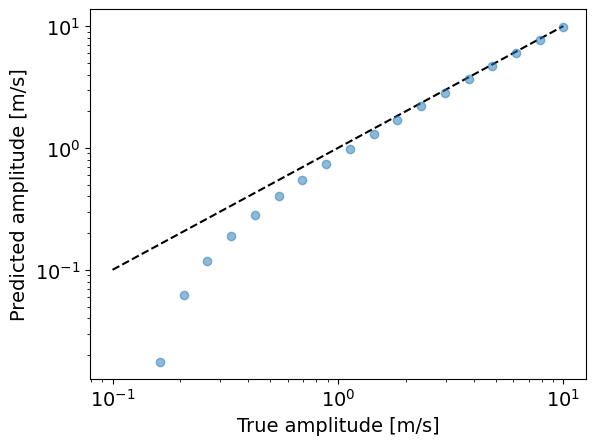

In [29]:
plt.plot(amp, amp, 'k--')
plt.plot(amp, amp_pred, 'o', alpha=0.5)
plt.xlabel('True amplitude [m/s]')
plt.ylabel('Predicted amplitude [m/s]')
# plt.xlim([0.009, 5])
# plt.ylim([0.009, 5])
plt.xscale('log')
plt.yscale('log')

In [30]:
Y = rv_daily - np.mean(rv_daily) 
np.average(Y**2, weights = 1/σrv_daily**2)**0.5

0.9507221842703535

rms = 0.9143186792255724
[ 2.01523132e-01  6.66339547e-02  1.90709239e-02  4.90613499e-03
  5.24574869e-04  3.15535141e-01 -1.00000000e+00  1.50980449e-01
  8.67333427e-01  1.42155297e-01  2.06295820e-01]


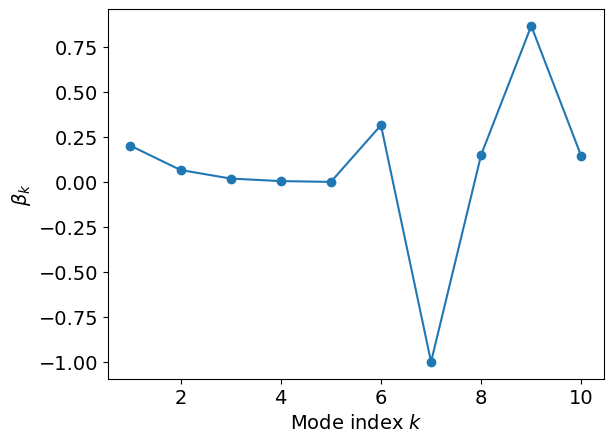

In [31]:
from scipy import optimize
from sklearn.model_selection import KFold

order_max = 10
# X = ΔRV_k[:order_max].T
X = np.vstack((ΔRV_k[:5], A_k[:5])).T
Y = rv_daily - np.mean(rv_daily) 

def loss(params):
    params = 10*params
    diff = np.sum(params[:order_max]*X, axis=1) + params[order_max] - Y
    wrms = np.average(diff**2, weights = 1/σrv_daily**2)**0.5
    return wrms

import scipy.optimize as opt


sol = opt.dual_annealing(loss, bounds=[[-1,1] for i in np.arange(order_max+1)], maxiter=2000)
fitted_params = sol.x

# initial_guess = np.zeros(order_max+2)
# result = optimize.minimize(loss, initial_guess, method='L-BFGS-B')
# # result = optimize.minimize(loss, initial_guess)

# # if result.success:
# fitted_params = result.x
print('rms =', loss(fitted_params))
# else:
#     raise ValueError(result.message)    

plt.plot(np.arange(order_max)+1, fitted_params[:order_max], 'o-')    
# plt.plot(np.arange(order_max)+1, A_k[:order_max]/A_k[0], 'o-')    
plt.xlabel('Mode index $k$')
plt.ylabel(r'$\beta_k$')

# print(fitted_params[order_max+1])
print(fitted_params)



In [32]:
print(fitted_params)

[ 2.01523132e-01  6.66339547e-02  1.90709239e-02  4.90613499e-03
  5.24574869e-04  3.15535141e-01 -1.00000000e+00  1.50980449e-01
  8.67333427e-01  1.42155297e-01  2.06295820e-01]


# Daily pattern

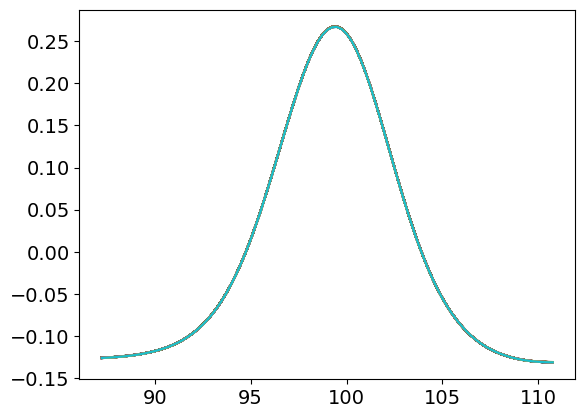

In [33]:
plt.plot(v_grid, CCF[:, idx] - np.mean(CCF[:, idx]))
plt.show()

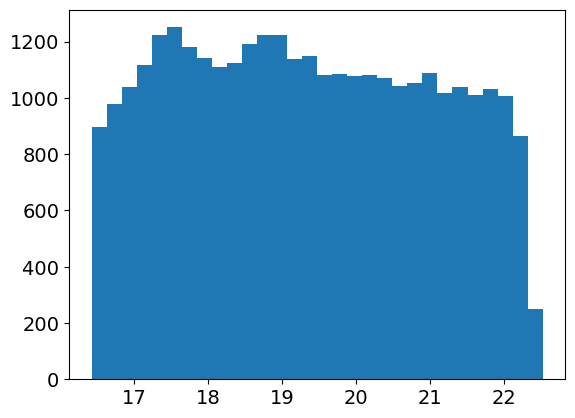

In [34]:
time = (bjd-[int(bjd[i]+0.5) for i in np.arange(len(bjd))]+0.5)*24
plt.hist(time, bins = 30)
plt.show()

In [35]:
df, shift_spectrum, err_shift_spectrum, power_spectrum, err_power_spectrum, RV_gauss = FIESTA(v_grid, CCF, σCCF, k_max=6)
shift_spectrum      *= 1000
err_shift_spectrum  *= 1000
RV_gauss            *= 1000
shift_function      = np.zeros(shift_spectrum.shape)

for i in range(shift_spectrum.shape[0]):
    shift_function[i,:] = shift_spectrum[i,:] - RV_gauss # look back; change rv_raw_daily


Velocity grid used [87.25, 110.75]

ξ_normal = 0.67


The median SNR of all CCFs is 5999
ξ_modelling_noise = 1.26


Based on the user-defined SNR = 2.0:
ξ_individual = 1.98
ξ_timeseries = 0.13

In summary, the cut-off frequency for FIESTA is recommended to be 0.13 (3 frequency modes)

        ξ  individual_SNR  ts_SNR_A  ts_SNR_ϕ  modelling noise  \
0   0.000         13382.5      27.5       0.0          0.13662   
1   0.042          8502.2      10.3     931.8          0.04870   
2   0.084          3145.1       4.5      12.4          0.01186   
3   0.126           772.9       2.5      77.9          0.00243   
4   0.168           158.0       1.3       1.5          0.00055   
5   0.211            11.9       1.0      19.4          0.00052   
6   0.253            16.4       0.9       0.9          0.00045   
7   0.295            11.1       0.9       0.8          0.00042   
8   0.337            10.1       0.8       0.8          0.00039   
9   0.379             8.8       0.7       0.7        

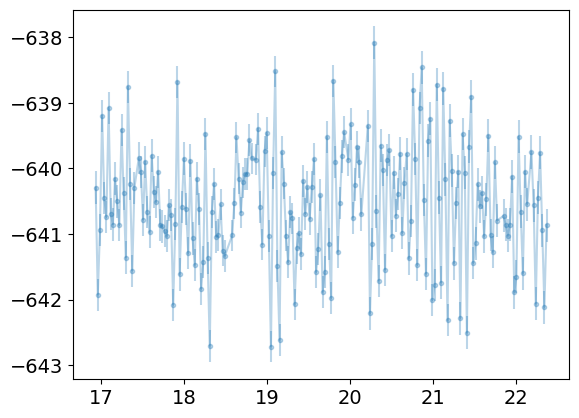

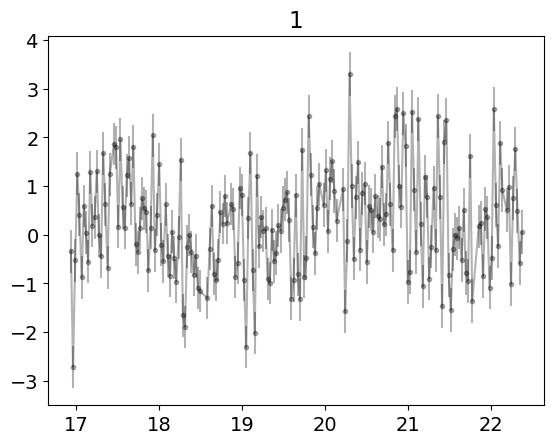

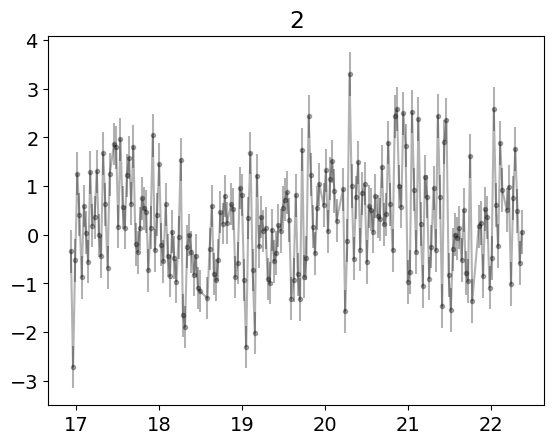

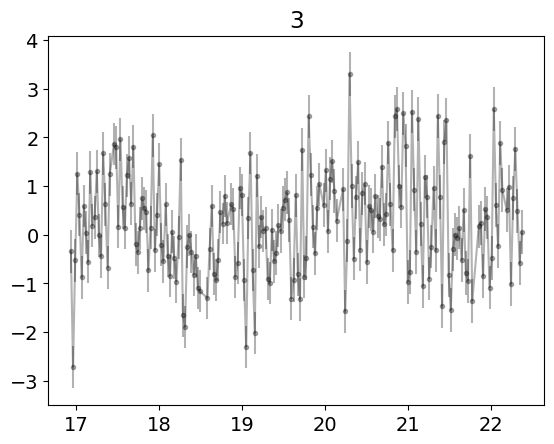

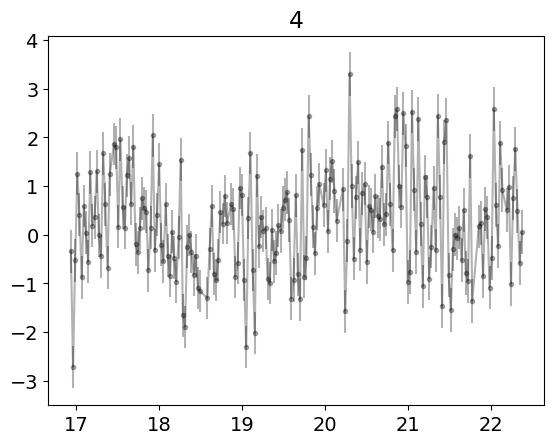

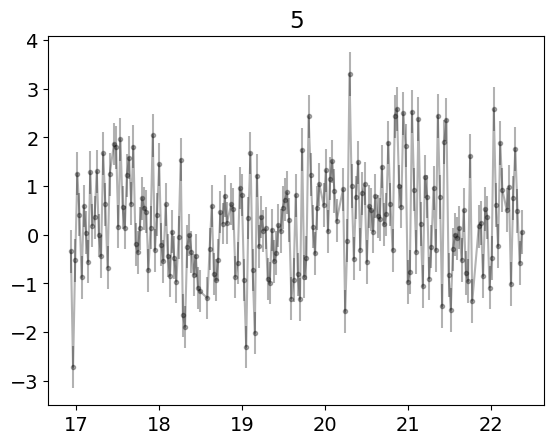

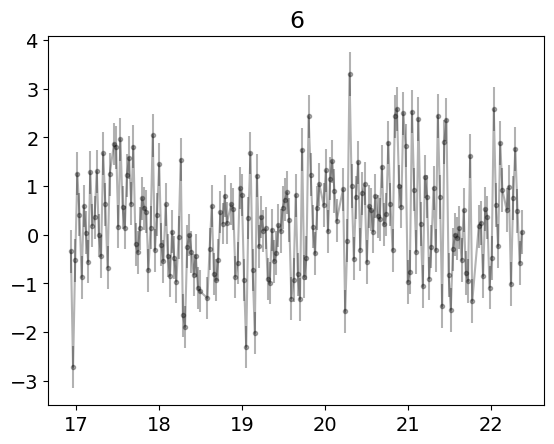

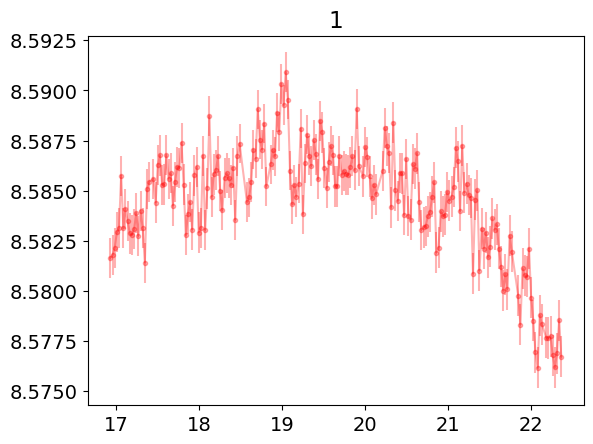

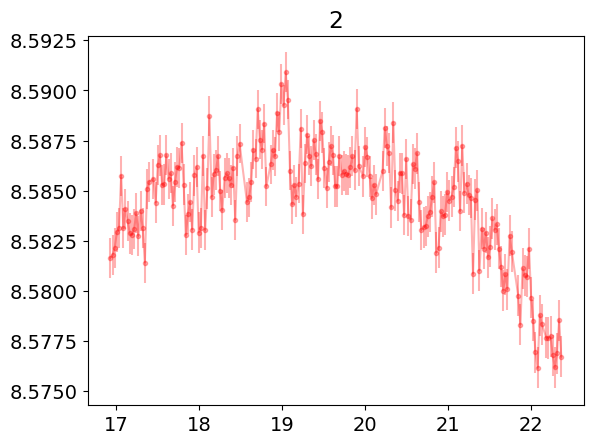

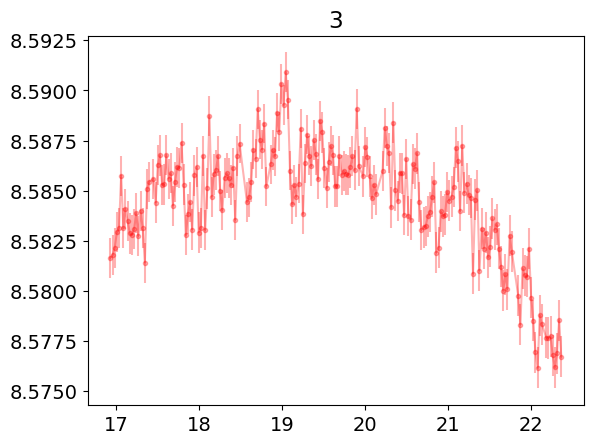

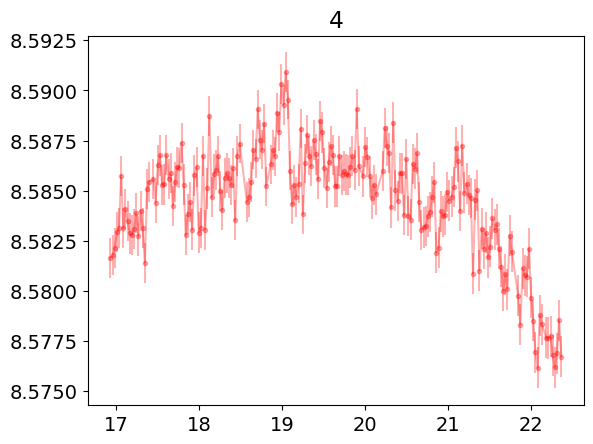

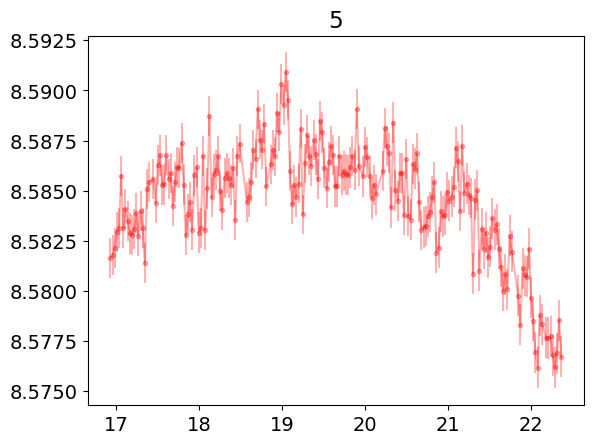

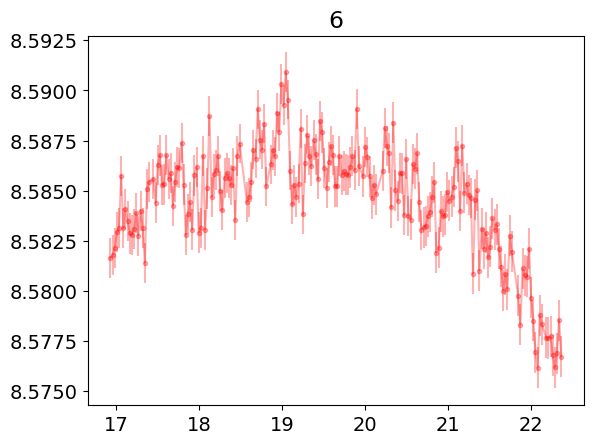

In [36]:
# idx = np.arange(1000) 
plt.errorbar(time[idx], rv[idx], σrv[idx], marker='.', alpha=0.3)
plt.show()

for i in range(6):
    plt.title(str(i+1))
    plt.errorbar(time[idx], shift_spectrum[0,idx], err_shift_spectrum[0,idx], marker='.', color='k', alpha=0.3)
    plt.show()

for i in range(6):
    plt.title(str(i+1))
    plt.errorbar(time[idx], power_spectrum[0,idx], err_power_spectrum[0,idx], marker='.', color='r', alpha=0.3)
    plt.show()

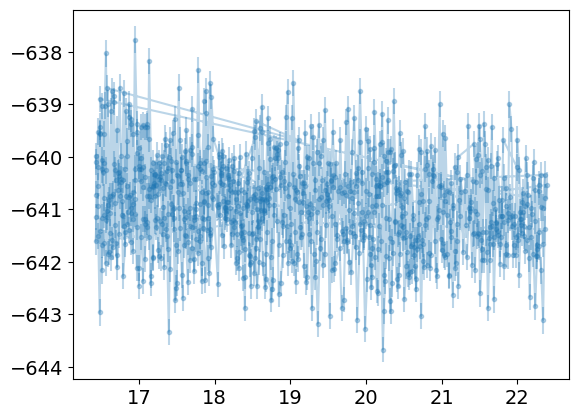

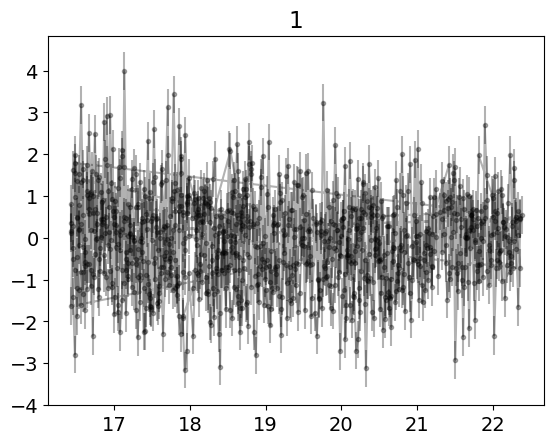

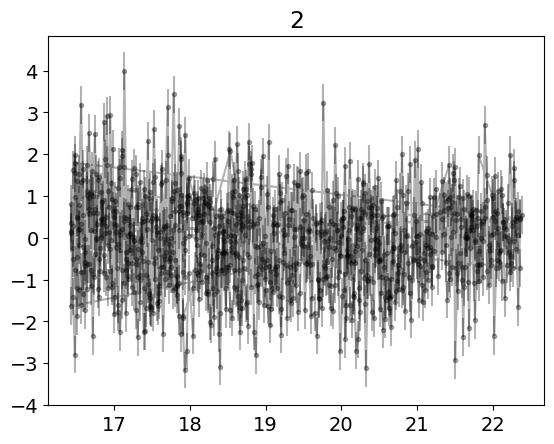

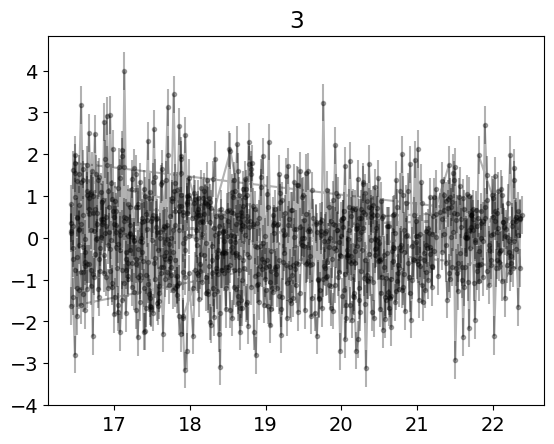

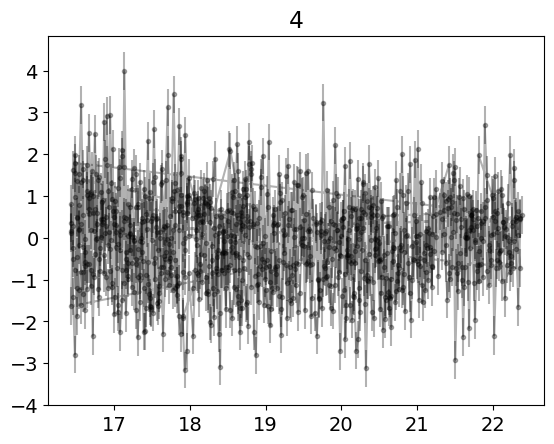

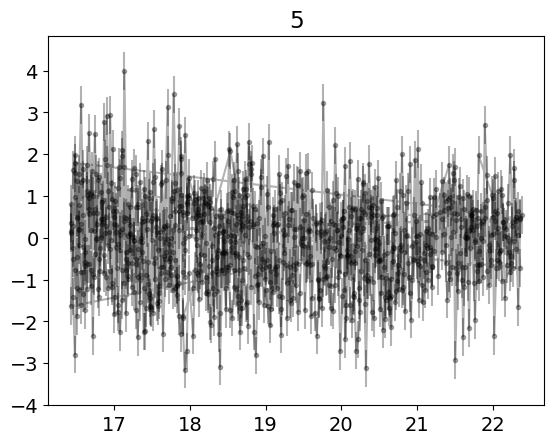

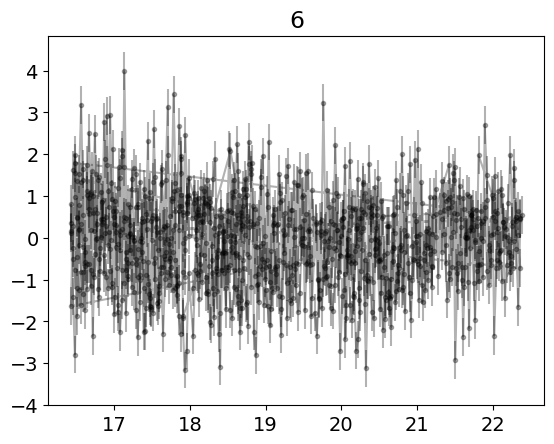

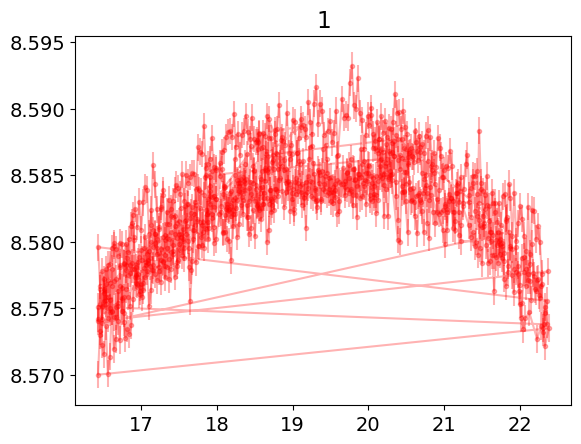

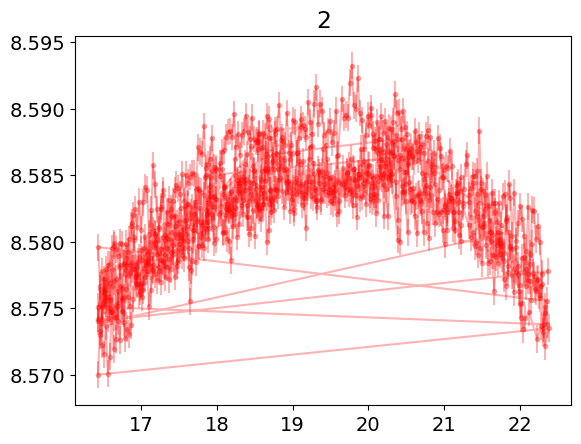

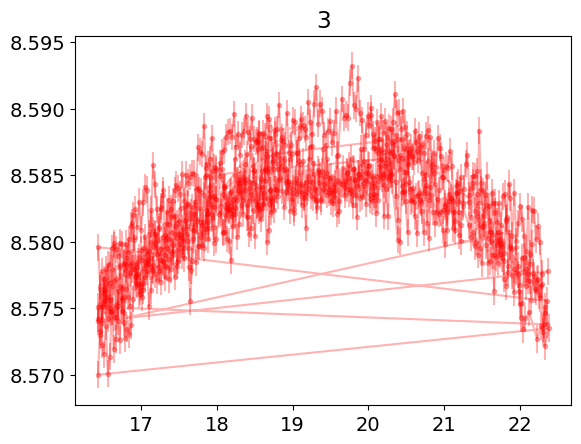

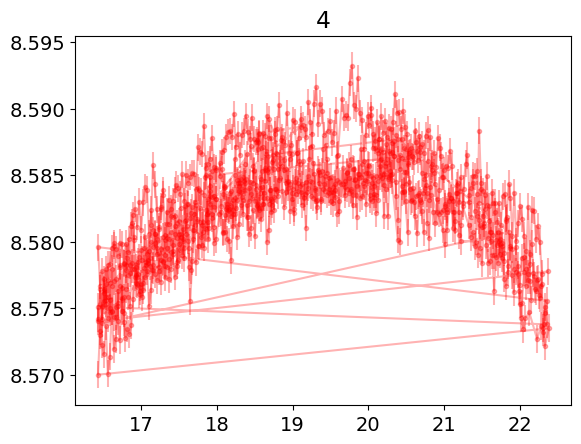

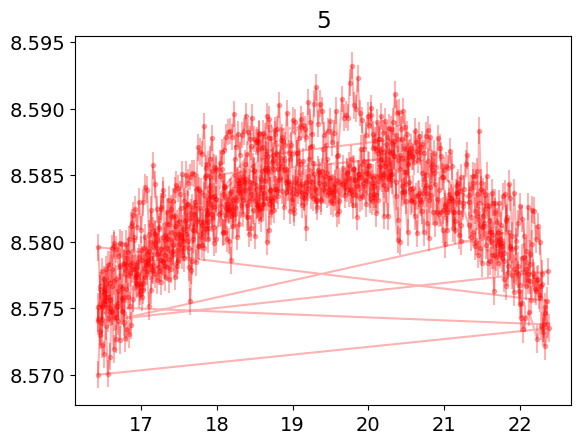

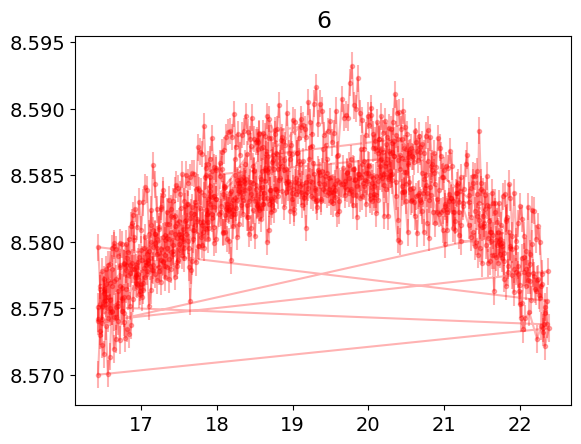

In [37]:
idx = np.arange(1000)+ 10000
plt.errorbar(time[idx], rv[idx], σrv[idx], marker='.', alpha=0.3)
plt.show()

for i in range(6):
    plt.title(str(i+1))
    plt.errorbar(time[idx], shift_spectrum[0,idx], err_shift_spectrum[0,idx], marker='.', color='k', alpha=0.3)
    plt.show()

for i in range(6):
    plt.title(str(i+1))
    plt.errorbar(time[idx], power_spectrum[0,idx], err_power_spectrum[0,idx], marker='.', color='r', alpha=0.3)
    plt.show()

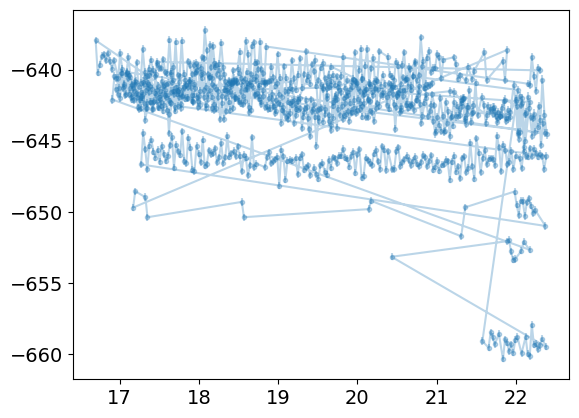

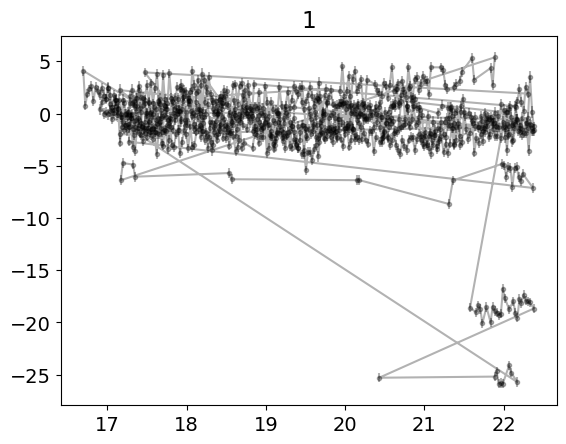

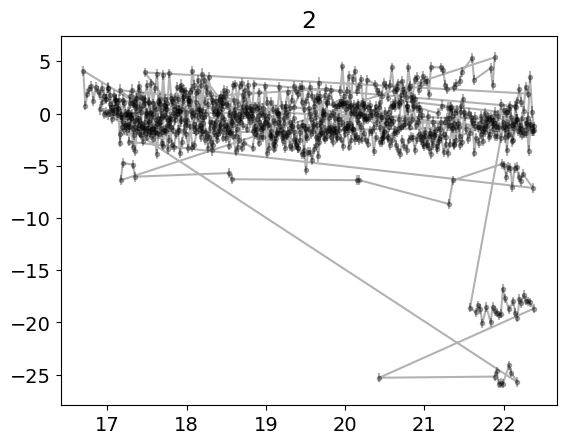

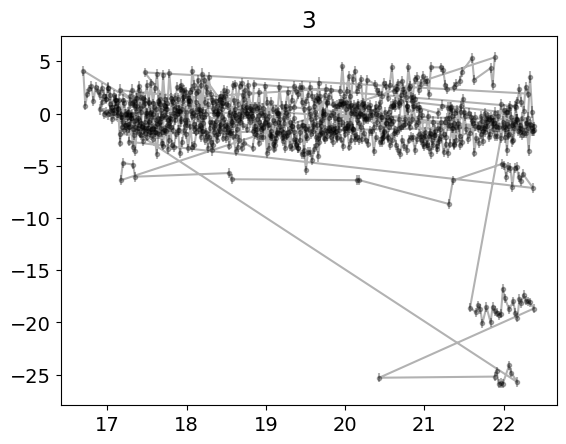

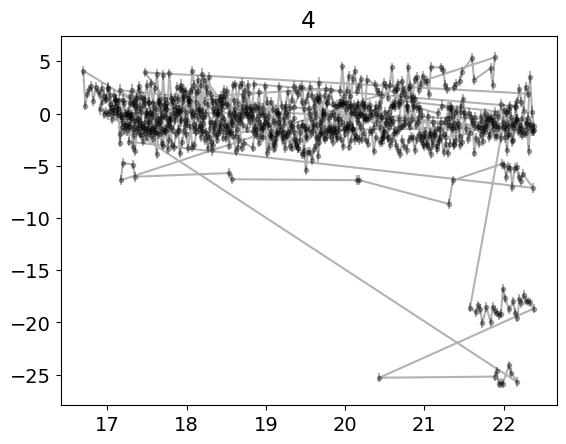

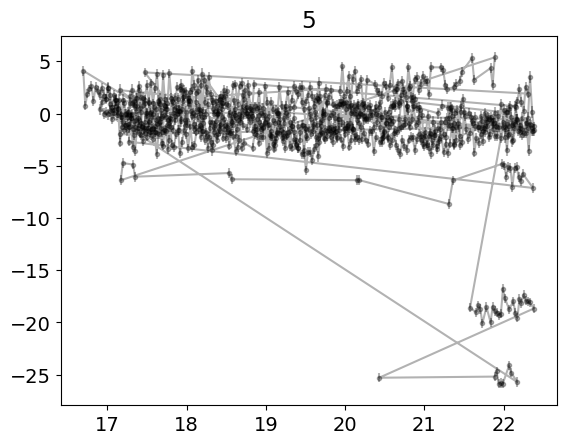

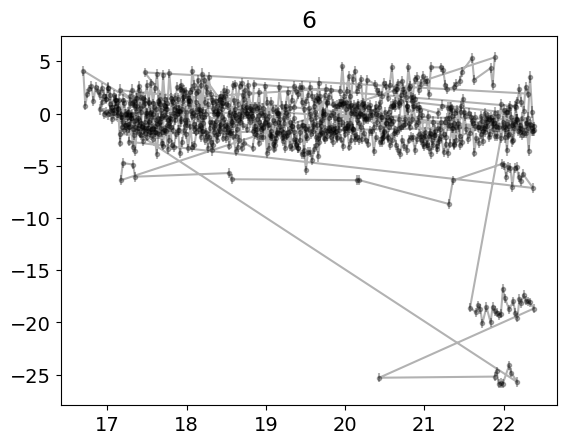

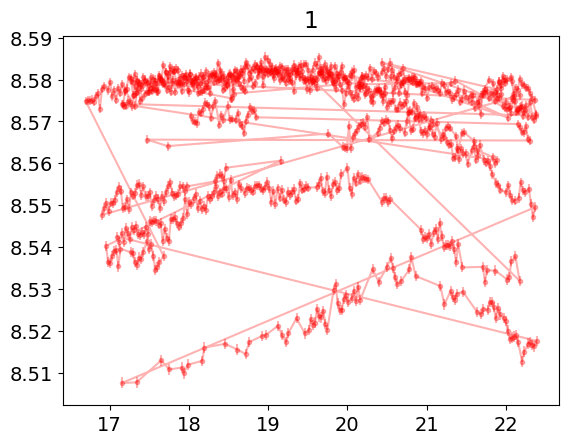

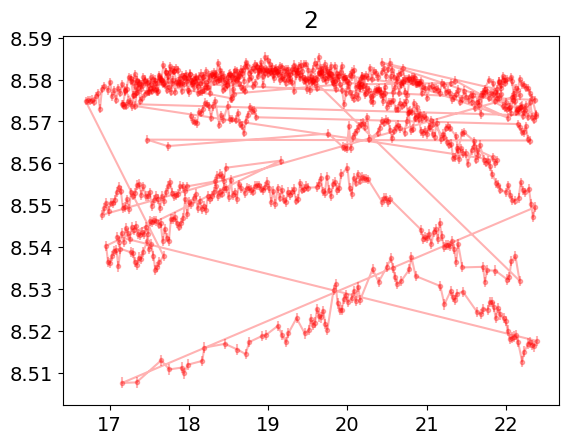

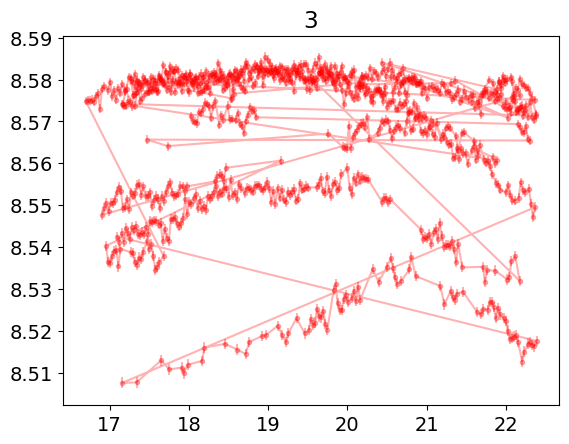

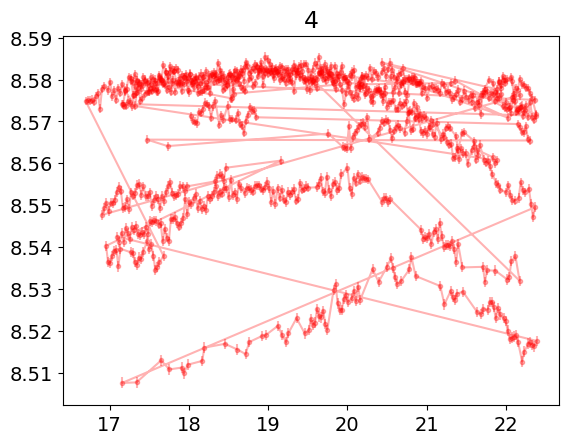

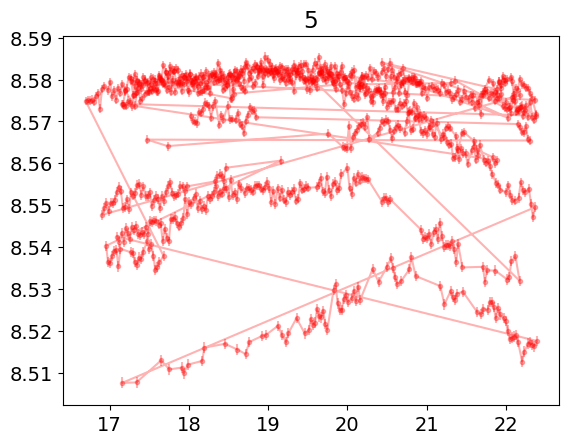

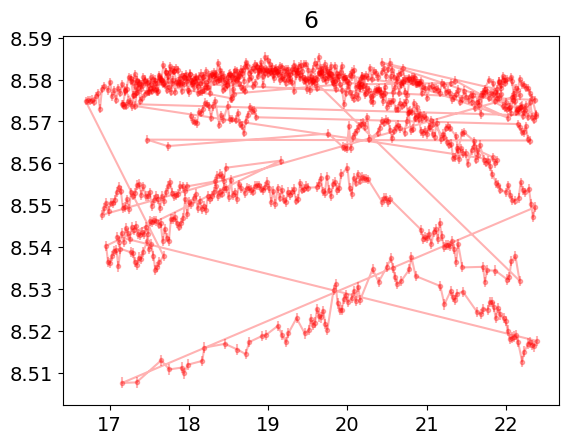

In [38]:
idx = np.arange(1000)+ 20000
plt.errorbar(time[idx], rv[idx], σrv[idx], marker='.', alpha=0.3)
plt.show()

for i in range(6):
    plt.title(str(i+1))
    plt.errorbar(time[idx], shift_spectrum[0,idx], err_shift_spectrum[0,idx], marker='.', color='k', alpha=0.3)
    plt.show()

for i in range(6):
    plt.title(str(i+1))
    plt.errorbar(time[idx], power_spectrum[0,idx], err_power_spectrum[0,idx], marker='.', color='r', alpha=0.3)
    plt.show()

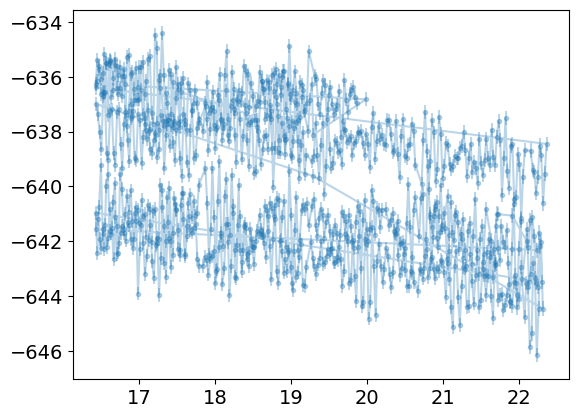

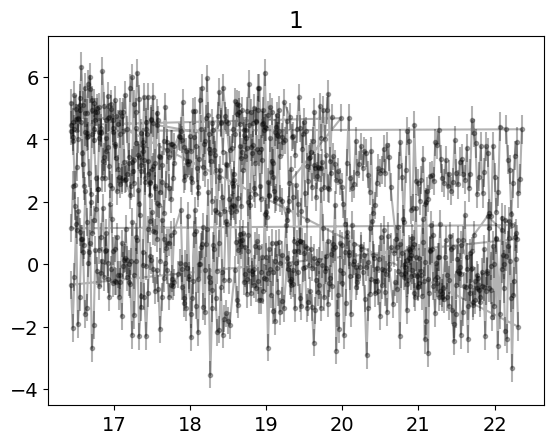

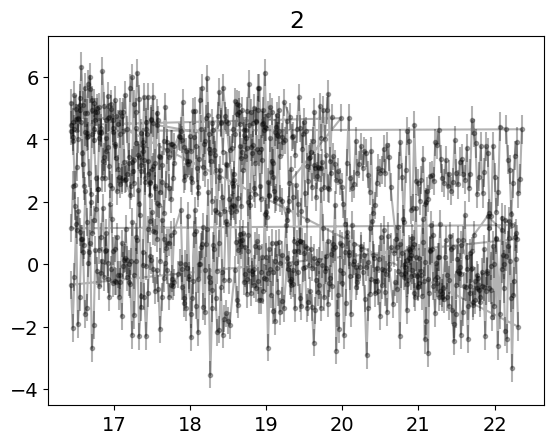

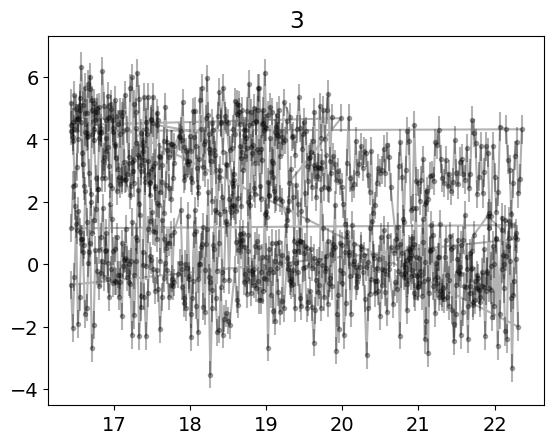

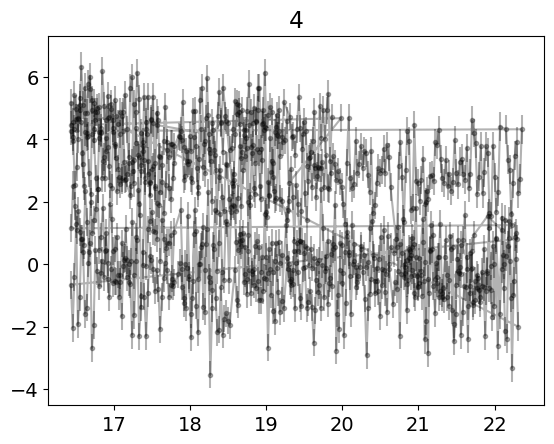

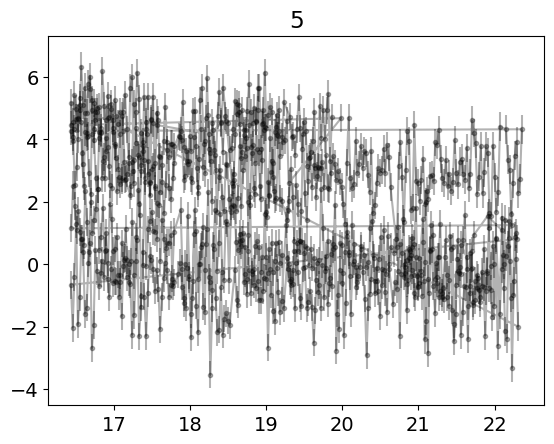

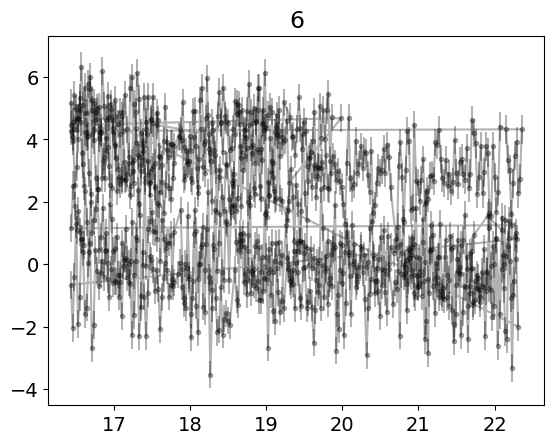

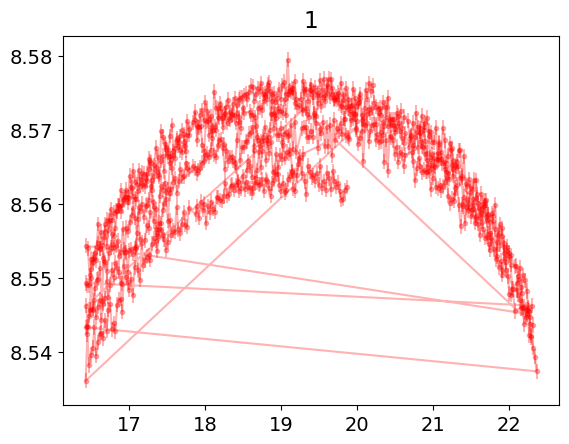

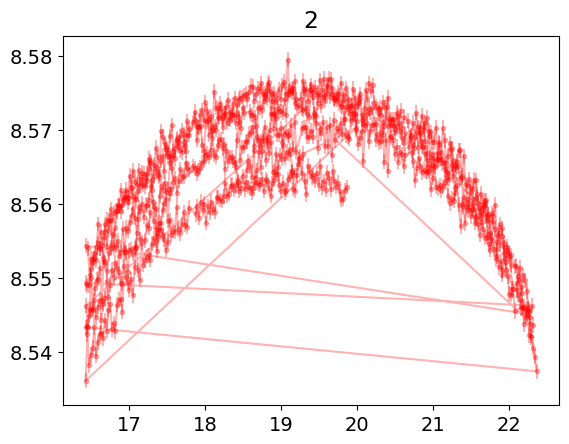

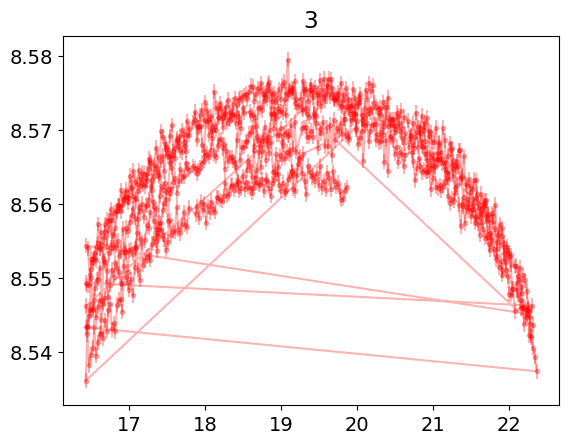

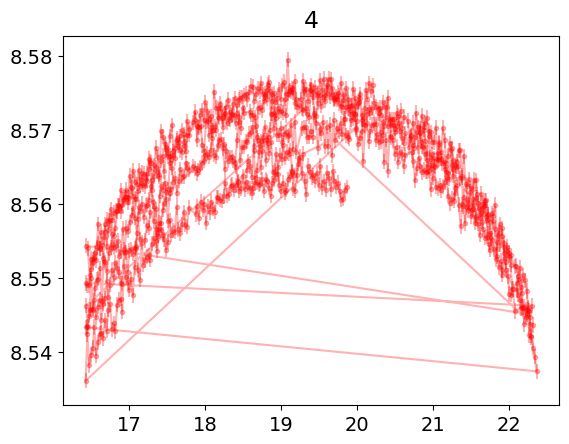

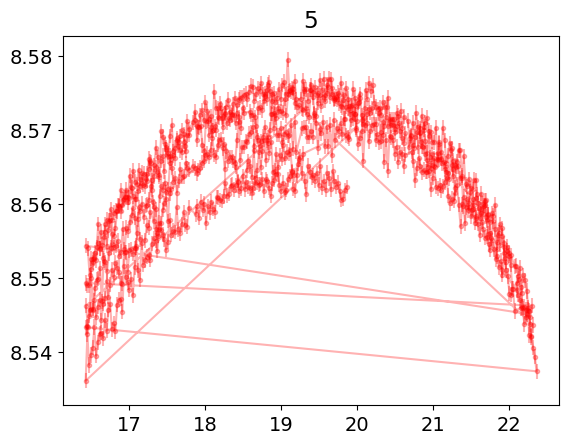

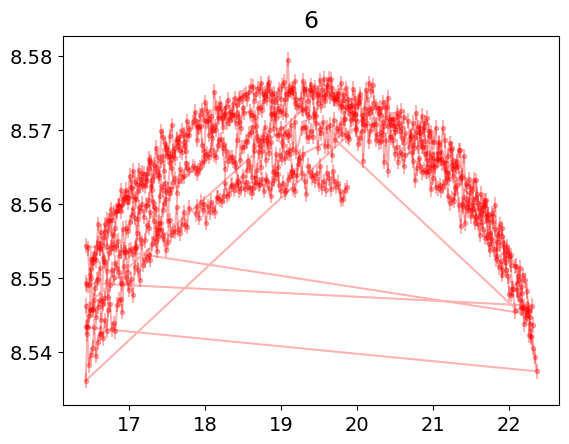

In [39]:
idx = np.arange(1000)+ 30000
plt.errorbar(time[idx], rv[idx], σrv[idx], marker='.', alpha=0.3)
plt.show()

for i in range(6):
    plt.title(str(i+1))
    plt.errorbar(time[idx], shift_spectrum[0,idx], err_shift_spectrum[0,idx], marker='.', color='k', alpha=0.3)
    plt.show()

for i in range(6):
    plt.title(str(i+1))
    plt.errorbar(time[idx], power_spectrum[0,idx], err_power_spectrum[0,idx], marker='.', color='r', alpha=0.3)
    plt.show()

In [40]:
err_shift_spectrum.shape

(6, 31795)

In [41]:
k_max = 5
N = 10

# injected parameters 
amp = np.logspace(-1, 1, N)
t_inj = 0.5
phase_inj = 1

t = bjd_daily - min(bjd_daily)
w_array_1 = np.zeros((N, k_max))
amp_pred_1 = np.zeros(N)
rms_array_1 = np.zeros(N)
phase_pred_1 = np.zeros(N)
t_pred_1 = np.zeros(N)

amp_pred_2 = np.zeros(N)
rms_array_2 = np.zeros(N)
phase_pred_2 = np.zeros(N)
t_pred_2 = np.zeros(N)

def wmse(y1, y2, w):
    wmse = np.average((y1-y2)**2, weights = w)
    return wmse

def model_1(params_1):
    '''
        FIESTA activity model + Keplerian 
    '''
    planet_rv_model = 10**params_1[k_max+1]*np.sin(10**params_1[k_max+3]*t + params_1[k_max+2]) 
    stellar_rv_model = np.sum(params_1[:k_max]*X[:,:k_max], axis=1) + params_1[k_max]
    rv_model = planet_rv_model + stellar_rv_model
    return rv_model

def model_2(params_2):
    '''
        Keplerian model
    '''
    planet_rv_model = 10**params_2[0]*np.sin(10**params_2[2]*t + params_2[1]) 
    return planet_rv_model
    
def execute(i):
    y = Y + amp[i] *np.sin(t_inj*t+phase_inj)  
    
    def loss_1(params_1):
        return wmse(model_1(params_1), y, 1/σrv_daily**2)
    
    # def loss_2(params_2):
    #     return wmse(model_2(params_2), y, 1/σrv_daily**2)
    
    sol_1 = opt.dual_annealing(loss_1, bounds=[[-5,5] for i in np.arange(k_max+1)] + [[-1.1,1.1], [0, np.pi], [np.log10(t_inj/1.5), np.log10(t_inj*1.5)]],  maxiter=1000)
    sol_2 = opt.dual_annealing(loss_2, bounds= [[-1.1,1.1], [0, np.pi], [np.log10(t_inj/1.5), np.log10(t_inj*1.5)]],  maxiter=1000)
    
    fitted_params_1 = sol_1.x
    fitted_params_2 = sol_2.x

    w_array_1[i] = fitted_params_1[:k_max]
    amp_pred_1[i] = 10**fitted_params_1[k_max+1]
    phase_pred_1[i] = fitted_params_1[k_max+2]
    t_pred_1[i] = 10**fitted_params_1[k_max+3]
    rms_array_1[i] = loss_1(fitted_params_1)**0.5

    amp_pred_2[i] = 10**fitted_params_2[k_max+1]
    phase_pred_2[i] = fitted_params_2[k_max+2]
    t_pred_2[i] = 10**fitted_params_2[k_max+3]
    rms_array_2[i] = loss_2(fitted_params_2)**0.5
    
    return w_array_1[i], amp_pred_1[i], phase_pred_1[i], t_pred_1[i] , rms_array_1[i], amp_pred_2[i], phase_pred_2[i], t_pred_2[i], rms_array_2[i]

if __name__ == "__main__":
    # first way, using multiprocessing
    start_time = time.perf_counter()
    
    with Pool(processes=os.cpu_count()) as pool:
        result = pool.map(execute, range(0,N)) 
    
    finish_time = time.perf_counter()
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))
    print("---")

for i in range(len(result)):
    w_array_1[i], amp_pred_1[i], phase_pred_1[i], t_pred_1[i], rms_array_1[i], amp_pred_2[i], phase_pred_2[i], t_pred_2[i], rms_array_2[i] = result[i] 
    
print('amp\n', amp)
print('amp_pred\n', amp_pred_1)
# print('amp_pred\n', amp_pred_2)

AttributeError: 'numpy.ndarray' object has no attribute 'perf_counter'